## Random Forest

#### Tutorials:

- [Ensemble learning for time series forecasting in R](https://petolau.github.io/Ensemble-of-trees-for-forecasting-time-series/)

### [Using regression trees for forecasting double-seasonal time series with trend in R](https://petolau.github.io/Regression-trees-for-forecasting-time-series-in-R/)

Classification and regression tree (or decision tree) is broadly used machine learning method for modeling. They are favorite because of these factors:

- simple to understand (white box)
- from a tree we can extract interpretable results and make simple decisions
- binary structure of tree is simple to visualize
- very good prediction accuracy performance
- very fast
- they can be simply tuned by ensemble learning techniques

But, they poorly adapt when new unexpected situations (values) appears. In other words, they can not detect and adapt to change or concept drift well. This is due to the fact that tree creates during learning just simple rules based on training data. Simple decision tree does not compute any regression coefficients like linear regression, so __trend modeling is not possible__. 

#### [Why Random Forests can’t predict trends?](https://medium.com/datadriveninvestor/why-wont-time-series-data-and-random-forests-work-very-well-together-3c9f7b271631)


Random Forests don’t fit very well for increasing or decreasing trends which are usually encountered when dealing with time-series analysis, such as seasonality.

For any data, that a Random Forest has not seen before, at best, it can predict an average of training values that it has seen before. It the Validation set consists of data points that are greater or less than the training data points, a Random Forest will provide us with Average results as it is not able to Extrapolate and understand the growing/decreasing trend in our data.

You will learn in this post how to:

decompose double-seasonal time series
detrend time series
model and forecast double-seasonal time series with trend
use two types of simple regression trees
set important hyperparameters related to regression tree

In [1]:
df_eu = read.csv(file="../hm/hts_eu_a10.csv", header=TRUE, sep=",")

In [2]:
library(data.table)

In [3]:
df_eu = as.data.table(df_eu)

In [4]:
df_eu

X0,BEA,BEB,BEF,BEG,BEJ,BEK,BEL,BEM,BEO,⋯,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR,ZTX
2000-01-01,698.5,12887.5,2825.0,10591.5,2161.0,3509,5215.0,5877.5,11166.5,⋯,76488.40,22862.20,73151.90,23719.95,20741.50,57761.00,37932.55,62936.55,13489.10,-16140.5667
2000-04-01,749.5,13162.0,3037.5,10809.5,2160.5,3558,5335.0,6166.0,11481.0,⋯,75447.70,23319.40,73312.00,24628.50,20607.85,57974.95,39850.10,64350.75,13577.45,-2465.0333
2000-07-01,786.5,12941.0,2840.5,10664.5,2141.0,3569,5452.5,6301.0,11073.5,⋯,75416.75,23405.15,74807.70,25083.70,20351.05,58053.75,41213.95,65464.95,13748.05,-10518.5333
2000-10-01,781.5,13301.0,3108.5,11425.5,2330.5,3535,5528.0,6625.5,11661.5,⋯,79694.75,24750.20,76852.75,25989.25,19280.20,59448.60,42271.75,67689.75,13551.25,26812.5167
2001-01-01,771.5,13219.5,2861.0,11164.5,2342.5,3452,5541.0,6534.5,11485.5,⋯,73919.55,22958.40,73992.25,24918.60,20554.10,57599.55,40398.35,65059.30,13200.30,-18966.6000
2001-04-01,745.5,13211.0,3149.0,11561.5,2416.5,3414,5604.5,6665.5,12023.5,⋯,73572.15,23664.10,78670.00,25203.90,20562.55,59190.70,42485.00,68913.70,14585.65,-2926.0000
2001-07-01,694.0,12900.5,2909.5,11278.5,2452.0,3429,5644.5,6661.5,11633.5,⋯,71456.25,23760.90,80100.10,24838.55,21063.95,58957.85,42972.20,69673.10,13831.10,-10491.5667
2001-10-01,722.0,13102.5,3128.0,11813.5,2611.0,3473,5603.0,6848.5,12358.5,⋯,71884.35,25196.45,80051.55,26368.15,20504.90,59958.10,43313.75,71595.25,14447.60,30863.1000
2002-01-01,737.5,13106.5,2857.0,11804.5,2508.5,3611,5582.5,6581.0,12264.0,⋯,73751.05,26461.25,79299.15,27238.85,21471.10,61639.60,44042.70,73197.95,14427.95,-23383.4167
2002-04-01,707.0,13366.5,3074.0,12210.0,2505.5,3659,5635.0,6668.0,12696.0,⋯,70725.35,26245.35,78358.25,26040.15,21111.15,59189.65,44634.30,72765.05,14850.50,947.0833


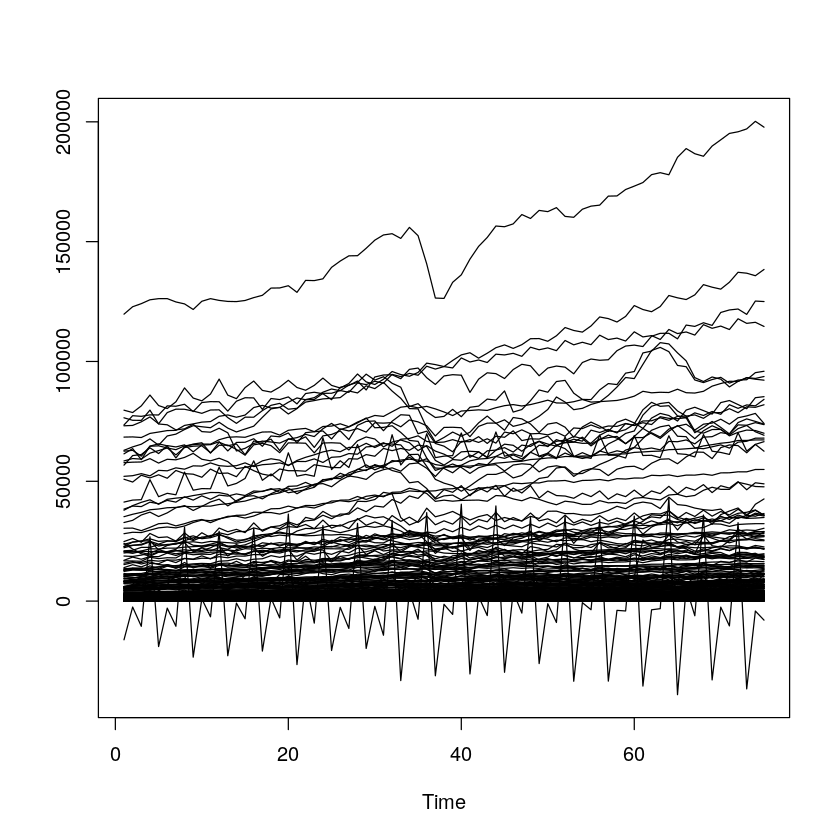

In [5]:
ts.plot(df_eu)

In [6]:
df_gdp = read.csv(file="../hm/data/eu_gdp_eu28.csv", header=TRUE, sep=",")

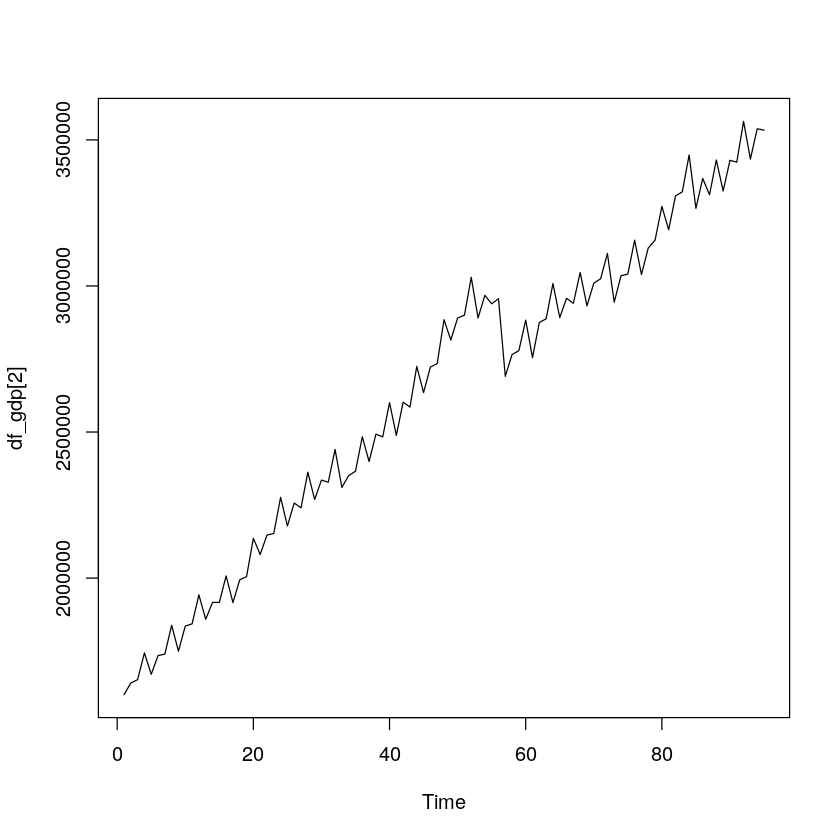

In [7]:
ts.plot(df_gdp[2])

In [8]:
DT <- as.data.table(df_gdp)
n_date <- unique(DT[, time])
period <- 4

In [9]:
length(n_date)

[1] 95

In [10]:
library(ggplot2)

In [11]:
theme_ts <- theme(panel.border = element_rect(fill = NA, 
                                              colour = "grey10"),
                  panel.background = element_blank(),
                  panel.grid.minor = element_line(colour = "grey85"),
                  panel.grid.major = element_line(colour = "grey85"),
                  panel.grid.major.x = element_line(colour = "grey85"),
                  axis.text = element_text(size = 13, face = "bold"),
                  axis.title = element_text(size = 15, face = "bold"),
                  plot.title = element_text(size = 16, face = "bold"),
                  strip.text = element_text(size = 16, face = "bold"),
                  strip.background = element_rect(colour = "black"),
                  legend.text = element_text(size = 15),
                  legend.title = element_text(size = 16, face = "bold"),
                  legend.background = element_rect(fill = "white"),
                  legend.key = element_rect(fill = "white"))

In [12]:
data_train <- DT[time %in% n_date[1:88]]
data_test <- DT[time %in% n_date[89:92]]

In [13]:
data_test

time,values
2017-01-01,3325036
2017-04-01,3430170
2017-07-01,3423832
2017-10-01,3563620


In [14]:
averages <- data.table(value = rep(sapply(0:21, function(i)
                        mean(data_train[((i*period)+1):((i+1)*period), values])),
                        each = period),
                       date_time = data_train$time) 

In [15]:
averages

value,date_time
1659487,1995-01-01
1659487,1995-04-01
1659487,1995-07-01
1659487,1995-10-01
1745916,1996-01-01
1745916,1996-04-01
1745916,1996-07-01
1745916,1996-10-01
1842839,1997-01-01
1842839,1997-04-01


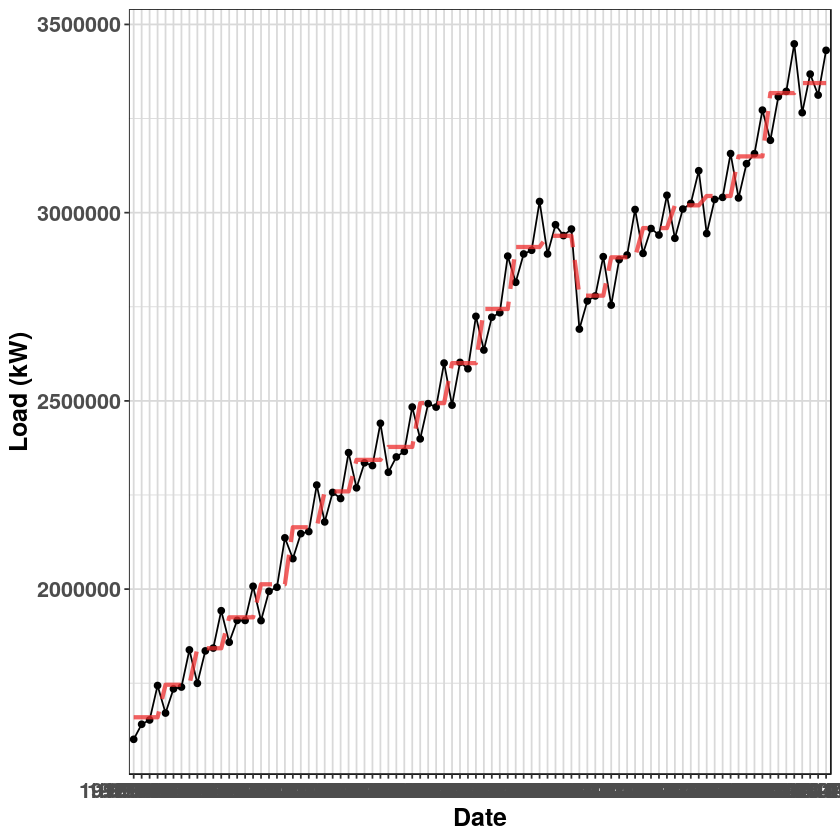

In [287]:
ggplot(data_train, aes(time, values, group = 1)) +
  geom_point() +
  geom_line() +
  geom_line(data = averages, aes(date_time, value),
            linetype = 5, alpha = 0.75, size = 1.2, color = "firebrick2") +
  labs(x = "Date", y = "Load (kW)") +
  theme_ts

In [288]:
library(stats)

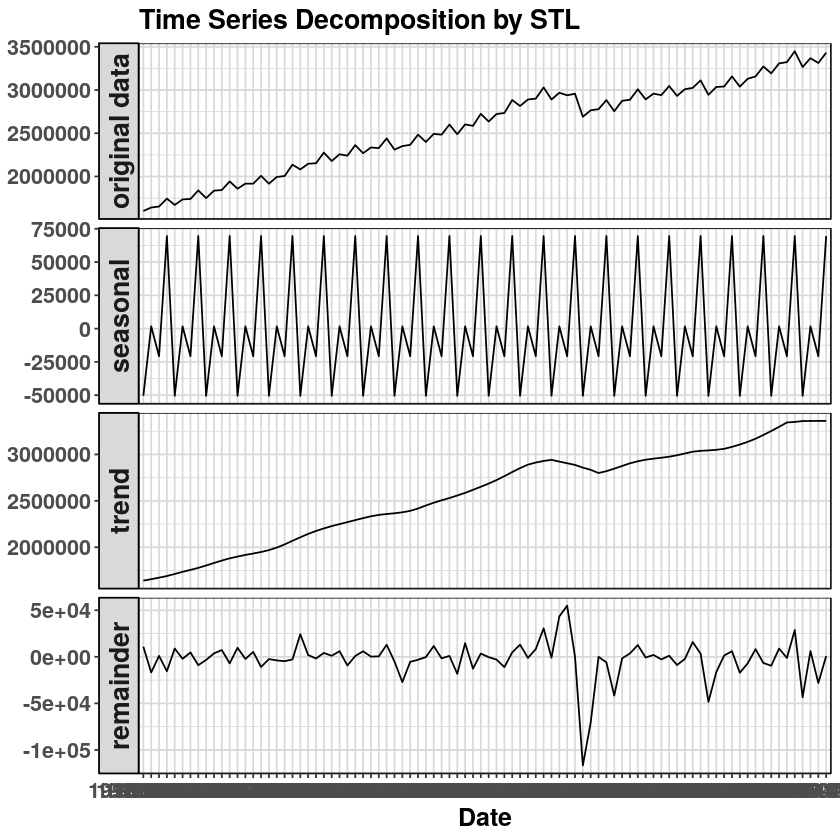

In [289]:
data_ts <- ts(data_train$values, freq = period)

decomp_ts <- stl(data_ts, s.window = "periodic", robust = TRUE)$time.series
 
decomp_stl <- data.table(Load = c(data_train$values, as.numeric(decomp_ts)),
                         Date = rep(data_train[,time], ncol(decomp_ts)+1),
                         Type = factor(rep(c("original data", colnames(decomp_ts)),
                                       each = nrow(decomp_ts)),
                                       levels = c("original data", colnames(decomp_ts))))
 
ggplot(decomp_stl, aes(x = Date, y = Load, group = 1 )) +
  geom_line() + 
  facet_grid(Type ~ ., scales = "free_y", switch = "y") +
  labs(x = "Date", y = NULL,
       title = "Time Series Decomposition by STL") +
  theme_ts

#### Constructing features to model

In [17]:
library(forecast)

In [18]:
data_msts <- msts(data_train$value, seasonal.periods = c(period, period*2))
data_msts

Multi-Seasonal Time Series:
Start: 1 1
Seasonal Periods: 4 8
Data:
 [1] 1600924 1640884 1652305 1743835 1670650 1734794 1739728 1838490 1749619
[10] 1835861 1843307 1942571 1858776 1916809 1916750 2007456 1916239 1994164
[19] 2004996 2136135 2080875 2147249 2152786 2276357 2178405 2256855 2240603
[28] 2362453 2268981 2335413 2328132 2440410 2310342 2351052 2365793 2483607
[37] 2399035 2492690 2483479 2600491 2488651 2602248 2585346 2724579 2635084
[46] 2722285 2734180 2884522 2815036 2890300 2900078 3029662 2890348 2967930
[55] 2939059 2956481 2690720 2765335 2778804 2883050 2754388 2875238 2887422
[64] 3008364 2891787 2957860 2940656 3046158 2932008 3009640 3024573 3111426
[73] 2944531 3035107 3040628 3156913 3039096 3130049 3156642 3272369 3192324
[82] 3308214 3322218 3448333 3265629 3368178 3312360 3431287


In [291]:
K <- 2

In [292]:
fuur <- fourier(data_msts, K = c(K, K))

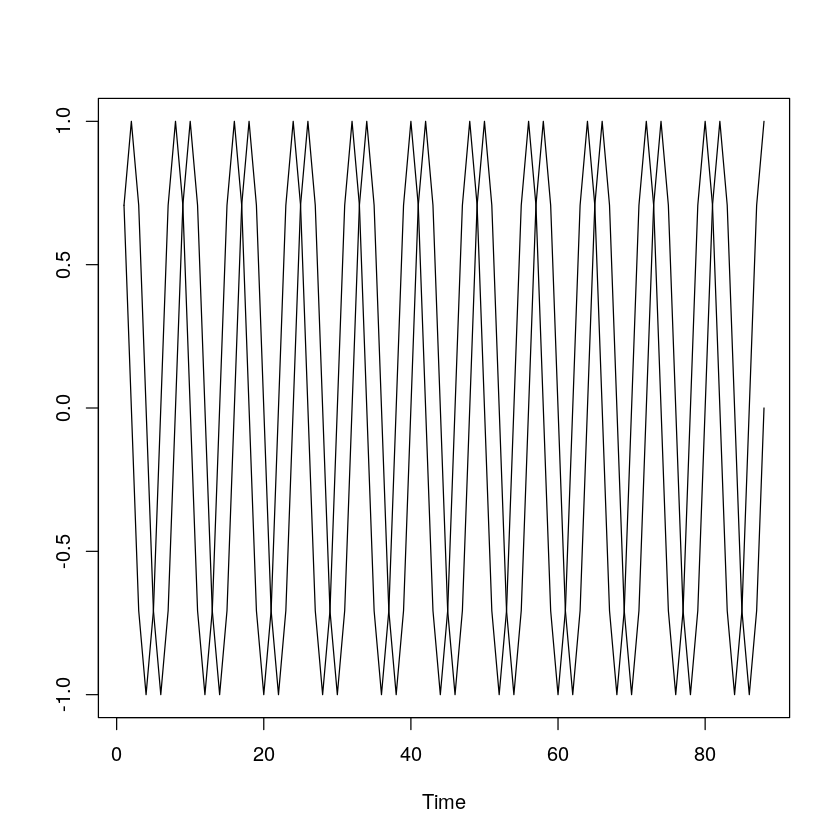

In [293]:
ts.plot(fuur[,4:5])

In [294]:
N <- nrow(data_train)
window <- (N / period) - 1 # number of days in train set minus lag
 
new_load <- rowSums(decomp_ts[, c(1,3)]) # detrended load
lag_seas <- decomp_ts[1:(period*window), 1] # seasonal part of time series as lag feature
 
matrix_train <- data.table(Load = tail(new_load, window*period),
                           fuur[(period + 1):N,],
                           Lag = lag_seas)

#### RPART (CART) tree

In the next two sections, I will describe two regression tree methods. The first is RPART, or CART (Classification and Regression Trees), the second will be CTREE. RPART is recursive partitioning type of binary tree for classification or regression tasks. It performs a search over all possible splits by maximizing an information measure of node impurity, selecting the covariate showing the best split.

I’m using rpart implementation from the same named package. Let’s go forward to modeling and try default settings of rpart function:



In [295]:
library(rpart) # decision tree method
library(rpart.plot) # tree plot

In [296]:
tree_1 <- rpart(Load ~ ., data = matrix_train)

In [297]:
tree_1$variable.importance

Lag         C1-4         C1-8         S1-4         C2-4         S1-8 
200272079136 161136692528 104904422405  42957432576   3822045969   2002024079

In [298]:
tree_1$cptable[dim(tree_1$cptable)[1], "nsplit"] # Number of splits

[1] 3

In [299]:
library(plotly)

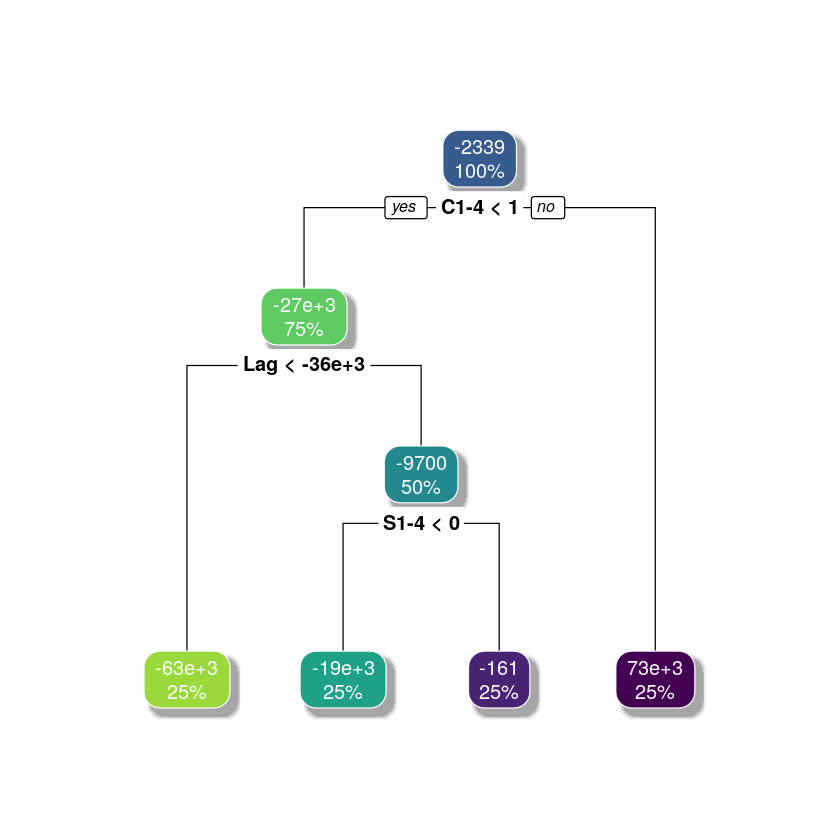

In [300]:
rpart.plot(tree_1, digits = 2, 
           box.palette = viridis::viridis(10, option = "D", begin = 0.85, end = 0), 
           shadow.col = "grey65", col = "grey99")

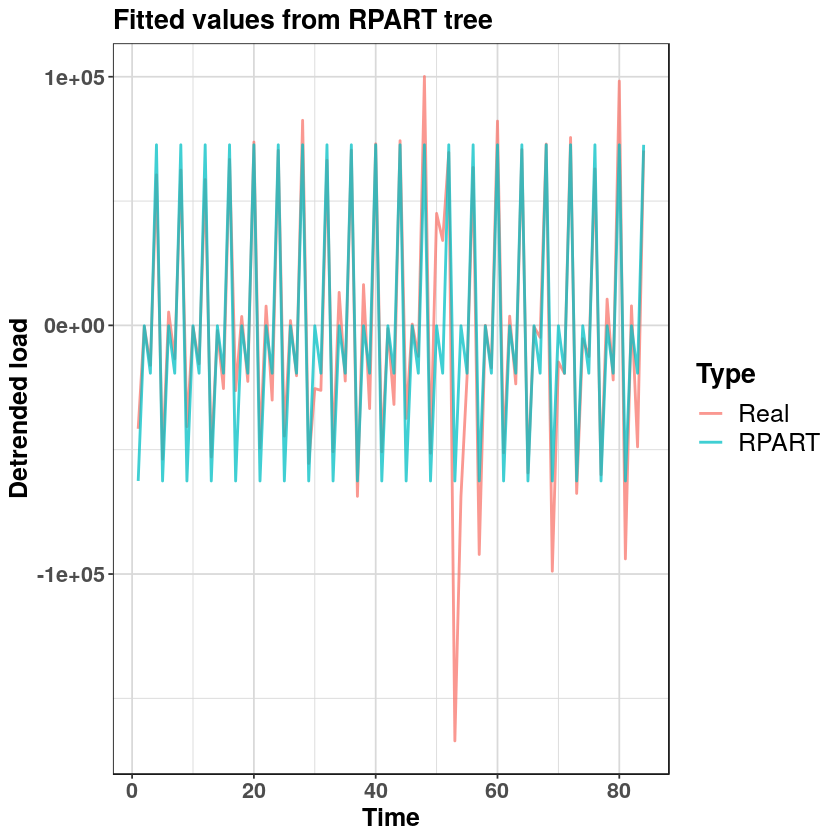

In [301]:
datas <- data.table(Load = c(matrix_train$Load,
                             predict(tree_1)),
                    Time = rep(1:length(matrix_train$Load), 2),
                    Type = rep(c("Real", "RPART"), each = length(matrix_train$Load)))
 
ggplot(datas, aes(Time, Load, color = Type)) +
  geom_line(size = 0.8, alpha = 0.75) +
  labs(y = "Detrended load", title = "Fitted values from RPART tree") +
  theme_ts

In [302]:
accuracy(matrix_train$Load, predict(tree_1))

,ME,RMSE,MAE,MPE,MAPE
Test set,9.516118e-12,20038.7,12043.82,-1.324119e-13,1765.946


 The cp is a threshold deciding if each branch fulfills conditions for further processing, so only nodes with fitness larger than factor cp are processed. Other important parameters are the minimum number of observations in needed in a node to split (minsplit) and the maximal depth of a tree (maxdepth). Set the minsplit to 2 and set the maxdepth to its maximal value - 30.

In [303]:
tree_2 <- rpart(Load ~ ., data = matrix_train,
                control = rpart.control(minsplit = 2 ,
                                        maxdepth = 30,
                                        cp = 0.000001))

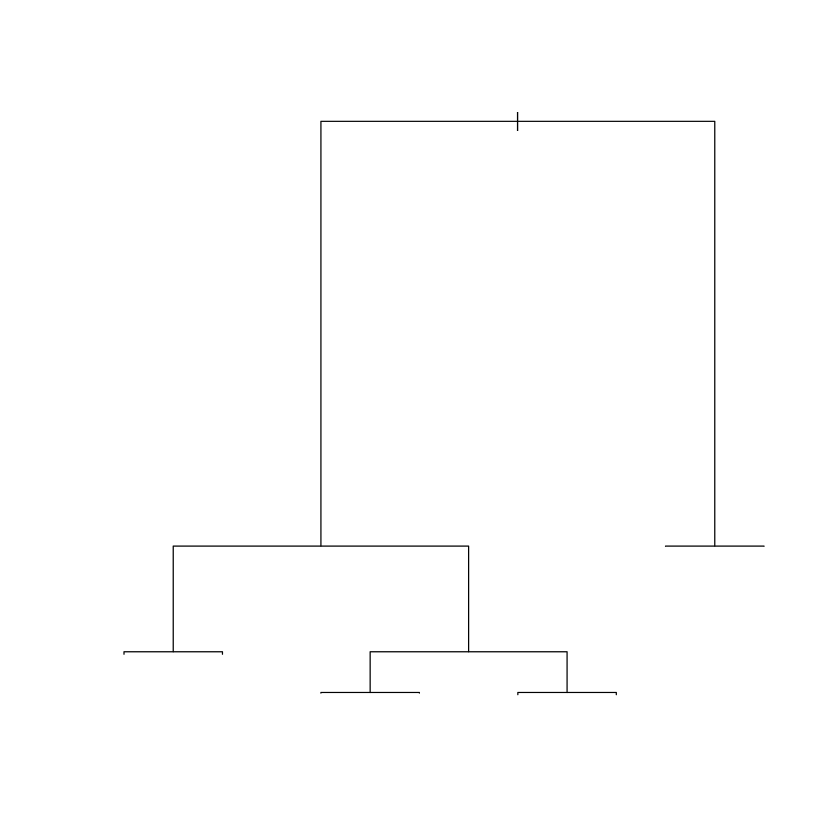

In [304]:
plot(tree_2, compress = TRUE)

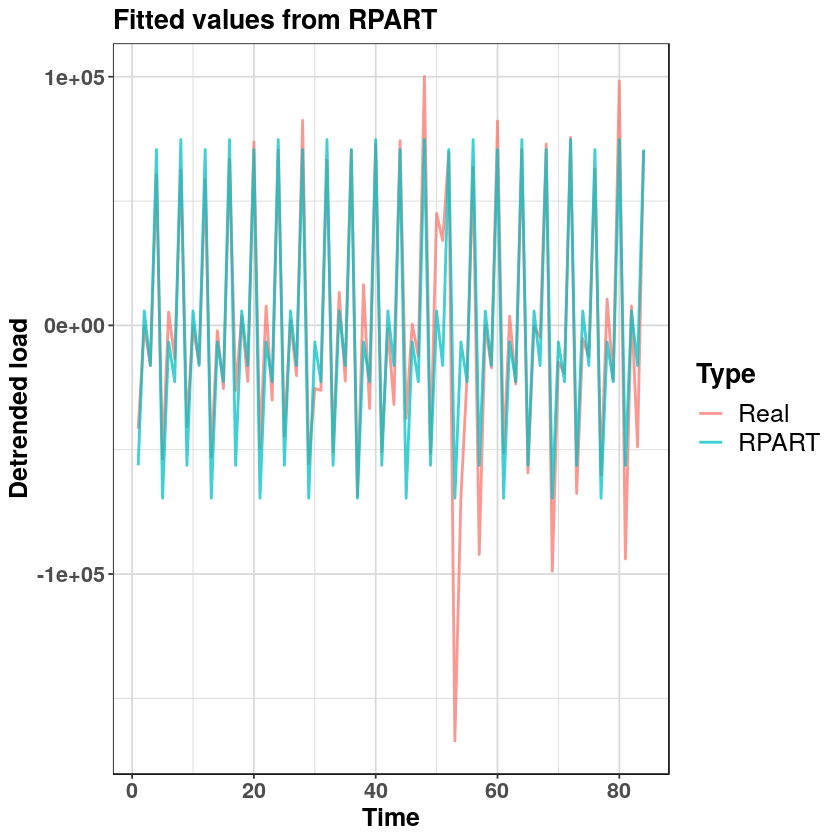

In [305]:
datas <- data.table(Load = c(matrix_train$Load,
                             predict(tree_2)),
                    Time = rep(1:length(matrix_train$Load), 2),
                    Type = rep(c("Real", "RPART"), each = length(matrix_train$Load)))
 
ggplot(datas, aes(Time, Load, color = Type)) +
  geom_line(size = 0.8, alpha = 0.75) +
  labs(y = "Detrended load", title = "Fitted values from RPART") +
  theme_ts


In [306]:
accuracy(matrix_train$Load, predict(tree_2))

,ME,RMSE,MAE,MPE,MAPE
Test set,1.494801e-12,19424.84,12511.33,-2.406813e-15,74.91997


In [307]:
test_lag <- decomp_ts[((period*window)+1):N, 1]
fuur_test <- fourier(data_msts, K = c(K, K), h = period)
 
matrix_test <- data.table(fuur_test,
                          Lag = test_lag)

In [308]:
trend_part <- ts(decomp_ts[,2])
trend_fit <- auto.arima(trend_part)
trend_for <- forecast(trend_fit, 4)$mean

In [309]:
for_rpart <- predict(tree_2, matrix_test) + trend_for


In [310]:
predict(tree_2, matrix_test)

1          2          3          4 
-69501.179  -6685.199 -22652.410  74705.374

In [311]:
library(ggforce) # visualization tools

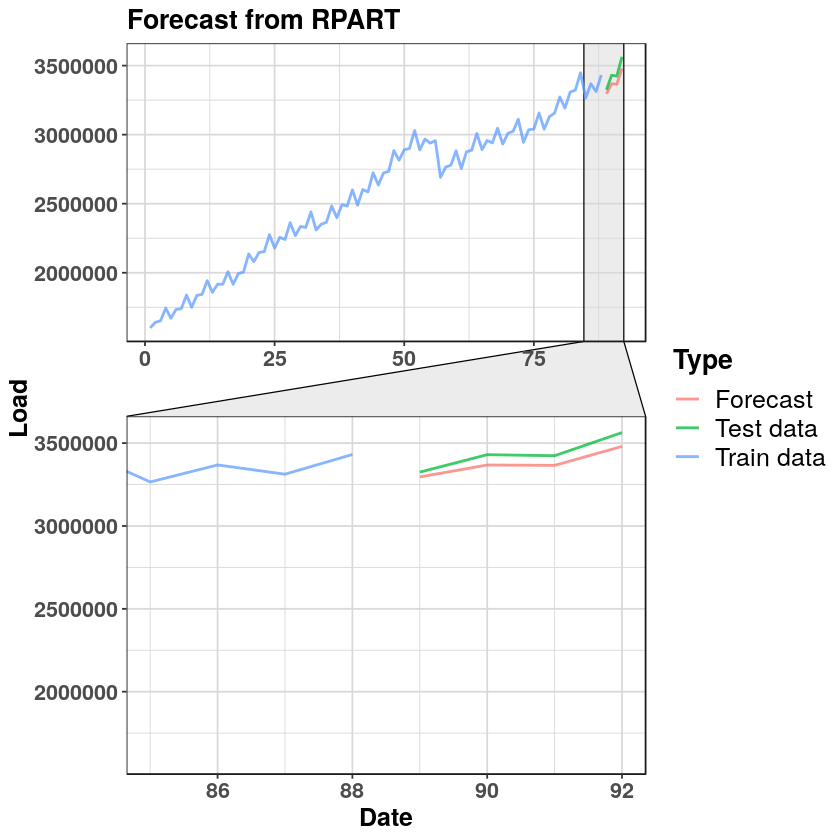

In [312]:
data_for <- data.table(Load = c(data_train$values, data_test$values, for_rpart),
                       Date = c(data_train$time, rep(data_test$time, 2)),
                       Type = c(rep("Train data", nrow(data_train)),
                                rep("Test data", nrow(data_test)),
                                rep("Forecast", nrow(data_test))))
 
ggplot(data_for, aes(Date, Load, color = Type)) +
  geom_line(size = 0.8, alpha = 0.75) +
  facet_zoom(x = Date[85:95], zoom.size = 1.2) +
  labs(title = "Forecast from RPART") +
  theme_ts

In [313]:
accuracy(data_test$values, for_rpart)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-58283.1,61444.02,58283.1,-1.715559,1.715559,-0.07897069,0.8831919


#### CTREE

The second simple regression tree method that will be used is CTREE. Conditional inference trees (CTREE) is a statistical approach to recursive partitioning, which takes into account the distributional properties of the data. CTREE performs multiple test procedures that are applied to determine whether no significant association between any of the feature and the response (load in the our case) can be stated and the recursion needs to stop. In R CTREE is implemented in the package party in the function ctree.

In [314]:
library(party)

In [315]:
ctree_1 <- ctree(Load ~ ., data = matrix_train)

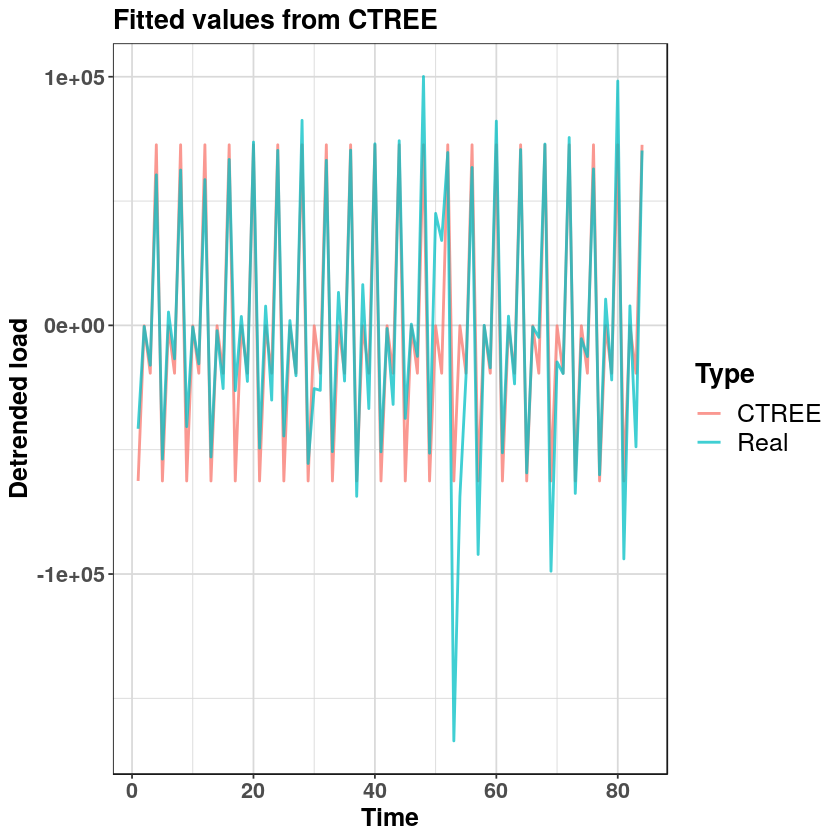

In [316]:
datas <- data.table(Load = c(matrix_train$Load,
                             predict(ctree_1)),
                    Time = rep(1:length(matrix_train$Load), 2),
                    Type = rep(c("Real", "CTREE"), each = length(matrix_train$Load)))
 
ggplot(datas, aes(Time, Load, color = Type)) +
  geom_line(size = 0.8, alpha = 0.75) +
  labs(y = "Detrended load", title = "Fitted values from CTREE") +
  theme_ts

In [317]:
accuracy(matrix_train$Load, predict(ctree_1))


,ME,RMSE,MAE,MPE,MAPE
Test set,2.980862e-12,20038.7,12043.82,-2.260496e-14,1765.946


For available hyperparameters tuning check ?ctree_control. Changing hyperparameters minsplit and minbucket is similar to cp parameter in RPART. The mincriterion can be tuned also, and it is significance level (1 - p-value) that must be exceeded in order to implement a split. 




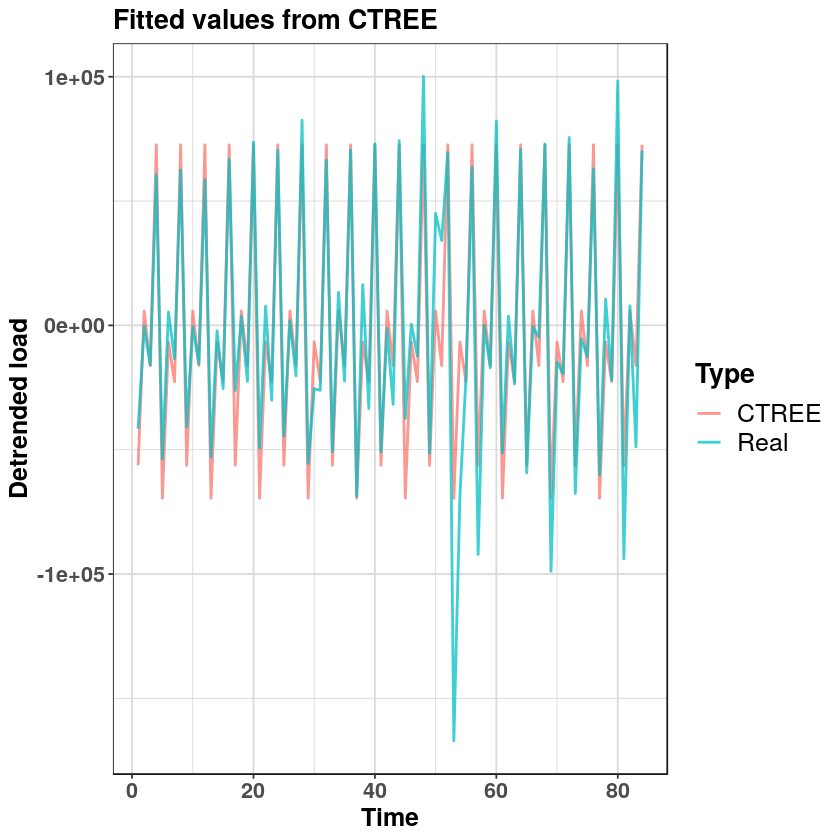

In [318]:
ctree_2 <- ctree(Load ~ ., data = matrix_train,
                        controls = party::ctree_control(teststat = "quad", 
                                                        testtype = "Teststatistic", 
                                                        mincriterion = 0.925,
                                                        minsplit = 1,
                                                        minbucket = 1))
 
datas <- data.table(Load = c(matrix_train$Load,
                             predict(ctree_2)),
                    Time = rep(1:length(matrix_train$Load), 2),
                    Type = rep(c("Real", "CTREE"), each = length(matrix_train$Load)))
 
ggplot(datas, aes(Time, Load, color = Type)) +
  geom_line(size = 0.8, alpha = 0.75) +
  labs(y = "Detrended load", title = "Fitted values from CTREE") +
  theme_ts

In [319]:
accuracy(matrix_train$Load, predict(ctree_2))


,ME,RMSE,MAE,MPE,MAPE
Test set,-1.355109e-12,19450.33,12443.94,-8.015532e-16,74.8447


In [320]:
for_ctree <- predict(ctree_2, matrix_test) + trend_for

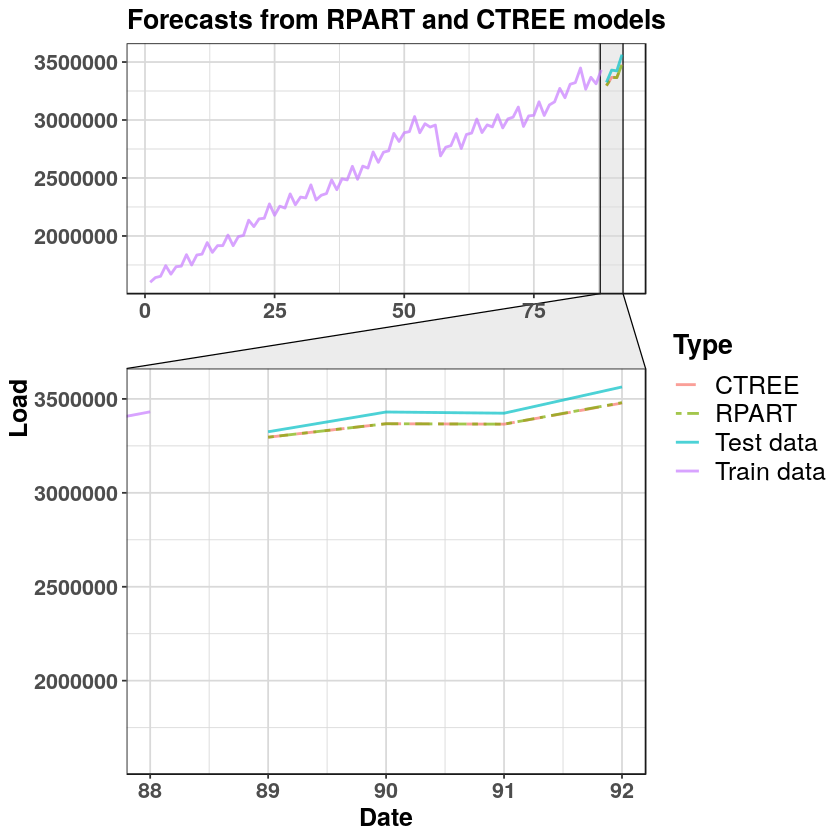

In [322]:
data_for <- data.table(Load = c(data_train$values, data_test$values, for_rpart, for_ctree),
                       Date = c(data_train$time, rep(data_test$time, 3)),
                       Type = c(rep("Train data", nrow(data_train)),
                                rep("Test data", nrow(data_test)),
                                rep("RPART", nrow(data_test)),
                                rep("CTREE", nrow(data_test))))
 
ggplot(data_for, aes(Date, Load, color = Type, linetype = Type)) +
  geom_line(size = 0.8, alpha = 0.7) +
  facet_zoom(x = Date[88:95], zoom.size = 1.62) +
  labs(title = "Forecasts from RPART and CTREE models") +
  scale_linetype_manual(values = c(5,6,1,1)) +
  theme_ts

In [323]:
accuracy(data_test$value, for_rpart)
accuracy(data_test$value, for_ctree)


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-58283.1,61444.02,58283.1,-1.715559,1.715559,-0.07897069,0.8831919


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-58805.2,62158.4,58805.2,-1.730931,1.730931,-0.07515428,0.905625


Slightly better MAPE value with RPART, but again now it can not be anything to generalize. You can read more about CTREE method in its great package [vignette](https://cran.r-project.org/web/packages/party/vignettes/party.pdf). 

### Ensemble learning for time series forecasting in R

Ensemble learning methods are widely used nowadays for its predictive performance improvement. Ensemble learning combines multiple predictions (forecasts) from one or multiple methods to overcome accuracy of simple prediction and to avoid possible overfit. In the domain of time series forecasting, we have somehow obstructed situation because of dynamic changes in coming data. However, when a single regression model is used for forecasting, time dependency is not the obstacle, we can tune it at current time of a sliding window. For this reason, in this post, I will describe you two simple ensemble learning methods - Bagging and Random Forest. Bagging will be used with combination of two simple regression trees methods used in the previous post (RPART and CTREE). 


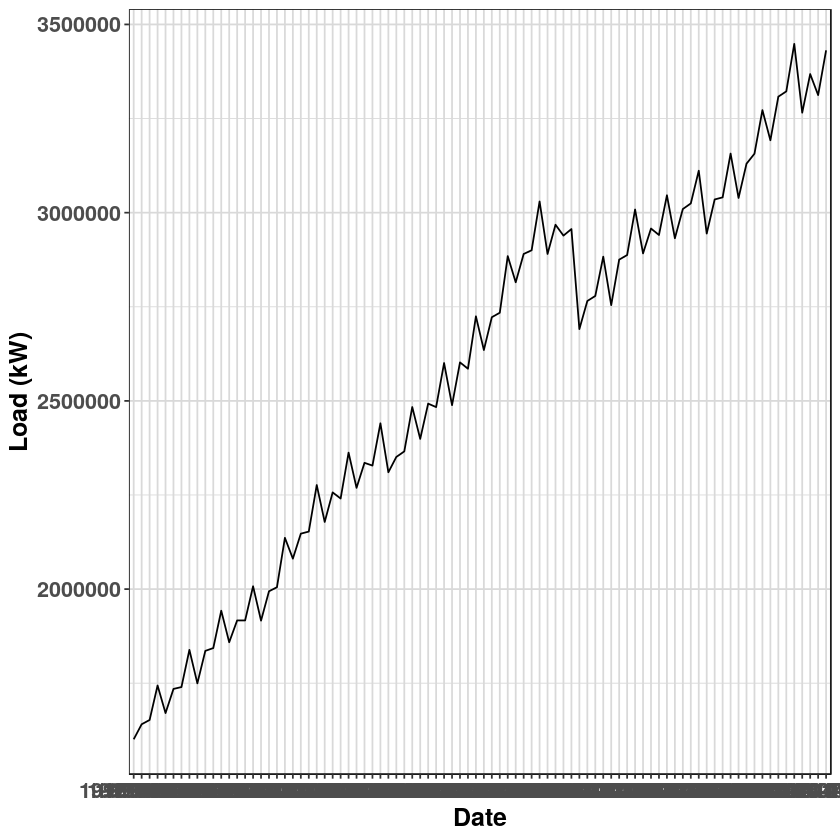

In [325]:
ggplot(data_train, aes(time, values, group=1)) +
  geom_line() +
  labs(x = "Date", y = "Load (kW)") +
  theme_ts


#### Bagging

Bagging or bootstrap aggregating, is ensemble learning meta-algorithm used to improve prediction accuracy and to overcome (avoid) overfitting. The algorithm is very simple. The first step is sampling a training dataset with replacement with some defined sample ratio (e.g. 0.7). Then a model is trained on a new train set. This procedure is repeated N_boot times (e.g. 100). Final ensemble prediction is just average of N_boot predictions. For aggregating predictions, the median can be also used and will be used in this post.

Bagging + RPART
The first “bagged” method is RPART (CART) tree. Training set consists of lagged electricity load by one day and double-seasonal Fourier terms (daily and weekly seasonality). Electricity consumption is firstly detrended by STL decomposition and trend part is forecasted (modeled) by ARIMA (auto.arima function). Seasonal and remainder part is then forecasted by regression tree model. More detailed description and explanations are in my previous post about regression trees methods. Let’s define train and test data (by matrix_train and matrix_test).

##### Offtop:
- [Forecast double seasonal time series with multiple linear regression in R](https://petolau.github.io/Forecast-double-seasonal-time-series-with-multiple-linear-regression-in-R/)